In [15]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, Dense
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
from sklearn.model_selection import train_test_split
import tqdm
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import numpy as np

#### Train Test Split

In [9]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in labels:
    folderPath = os.path.join(f'Training/{i}')
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img, (image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('Testing/',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img, (image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [10]:
X_train.shape, Y_train.shape

((3264, 150, 150, 3), (3264,))

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train, test_size=0.1,random_state=42)

In [12]:
X_train.shape

(2937, 150, 150, 3)

In [13]:
X_test.shape

(327, 150, 150, 3)

In [14]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train = tf.keras.utils.to_categorical(y_train_new)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test = tf.keras.utils.to_categorical(y_test_new)

In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [21]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=5
)

Epoch 1/5
83/83 [==============================] - 182s 2s/step - loss: 1.3716 - accuracy: 0.2894 - val_loss: 1.3745 - val_accuracy: 0.3095
Epoch 2/5
83/83 [==============================] - 164s 2s/step - loss: 1.3434 - accuracy: 0.3258 - val_loss: 1.3546 - val_accuracy: 0.4456
Epoch 3/5
83/83 [==============================] - 163s 2s/step - loss: 1.0936 - accuracy: 0.5123 - val_loss: 1.0064 - val_accuracy: 0.5340
Epoch 4/5
83/83 [==============================] - 172s 2s/step - loss: 0.9001 - accuracy: 0.6012 - val_loss: 0.8227 - val_accuracy: 0.6565
Epoch 5/5
83/83 [==============================] - 180s 2s/step - loss: 0.7672 - accuracy: 0.6776 - val_loss: 0.7927 - val_accuracy: 0.6633


In [22]:
model.save('brain_tumor_large.h5')

C:\Users\Dell\anaconda3\envs\GPUEnv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


We are only training this model for 5 epochs ddue to resource limitaions. You can train this for 20 epochs and then you'll have very good accuracy. With only 5 epochs we are able to achieve 67% accuracy.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

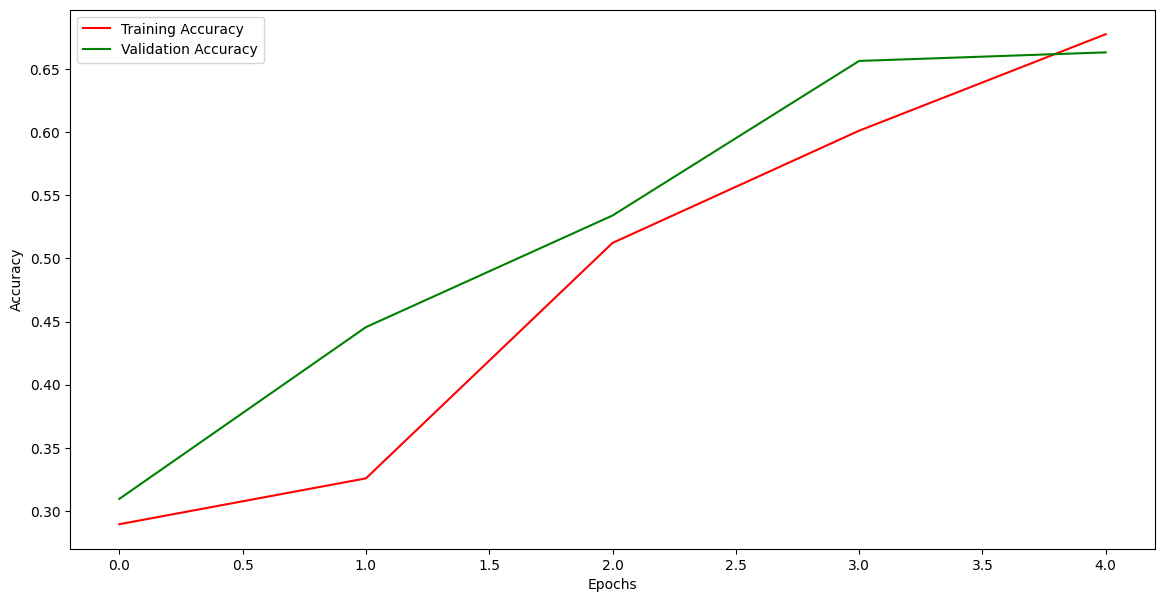

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

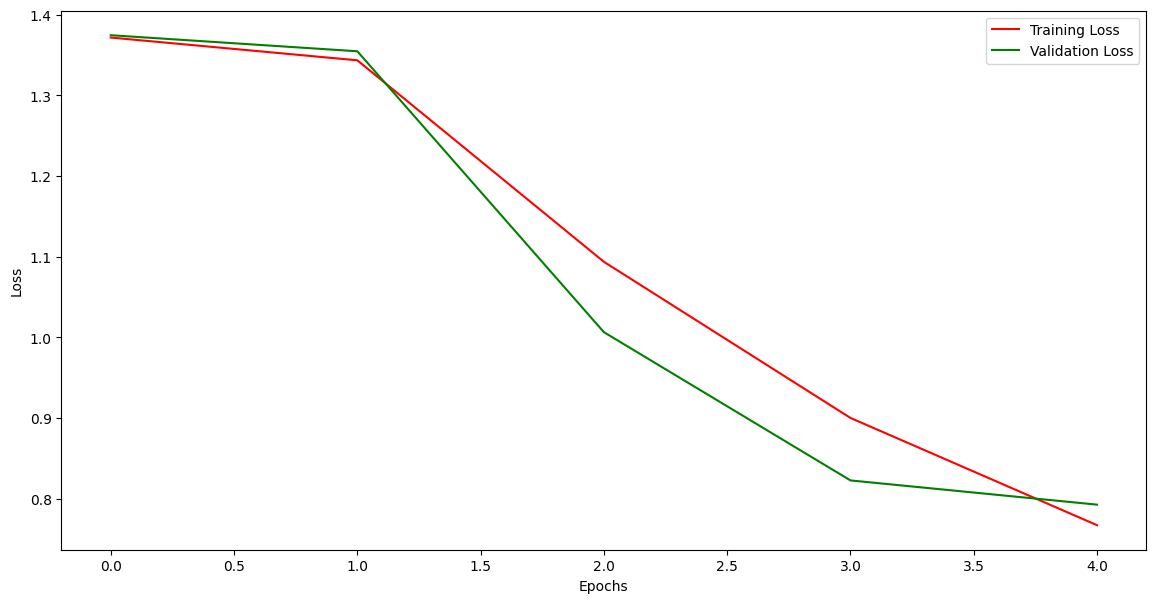

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
X_test[0].shape

(150, 150, 3)

In [37]:
y_test[0]

array([0., 1., 0., 0.], dtype=float32)

In [40]:
np.expand_dims(X_test[0],0).shape

(1, 150, 150, 3)

In [41]:
model.predict(np.expand_dims(X_test[0],0)) # wrong Prediction

1/1 [==============================] - 0s 156ms/step


array([[0.6415567 , 0.30243167, 0.04514398, 0.01086765]], dtype=float32)

In [42]:
model.predict(np.expand_dims(X_test[1],0))

1/1 [==============================] - 0s 33ms/step


array([[0.842181  , 0.1381355 , 0.01537382, 0.00430964]], dtype=float32)

In [43]:
y_test[1] # True Prediction

array([1., 0., 0., 0.], dtype=float32)